In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import numpy as np
import powerlaw
import collections
import math

In [2]:
%run Utilyties.ipynb

# Network initialization from file

In [3]:
data = read_data('../data/data_complete.json')
G = init_network(data)

# Static

## Analysis of the network

In [4]:
network_info(G, 'G')

Network information of G:
 Nodes: 	15378
 Edges: 	36496

 Average degree: 		4.746521004031734
 Transitivity: 		0.010300601756433787
 Average clustering: 	0.14928223371208652

 Connected components: 	204
 Diameter: 	12

 Density: 	0.00030867666020886606



In [5]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=False)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
deg=list(deg)
cnt=list(cnt)

In [6]:
x = list(deg[:30]) #we take the regime power law values
y = list(cnt[:30])
del x[0]
del y[0]

In [7]:
p,cov = np.polyfit([math.log(elem) for elem in x],[math.log(elem) for elem in y],1,cov=True)
print("The exponent of the power law is:", p[0],"\nThe logarithm of the moltiplicative constant is:", p[1])

The exponent of the power law is: -2.117501555155114 
The logarithm of the moltiplicative constant is: 9.569705772277553


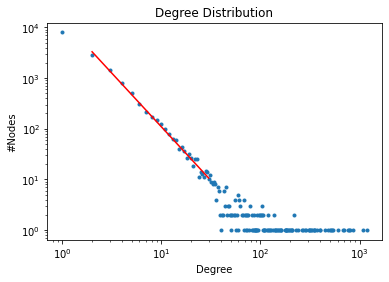

In [8]:
plt.plot(deg, cnt, ".")
plt.plot(x, [math.e**p[1]/(elem**(-p[0])) for elem in x], 'r') #log(y)=log(a)-klog(x) => y=a/x^k
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

## Giant compontent - G0

In [9]:
G0 = giant_component(G)

In [10]:
network_info(G0, 'giant component - G0')

Network information of giant component - G0:
 Nodes: 	14883
 Edges: 	36182

 Average degree: 		4.862191762413492
 Transitivity: 		0.010288345596862104
 Average clustering: 	0.15150365226709217

 Connected components: 	1
 Diameter: 	12

 Density: 	0.0003267162856076799

Average length of shortest paths: 3.994312254317719


# Centrality & Assortative Mixing

## Degree centrality

In [11]:
degrees = dict(G.degree()) #compute the degree of a set of nodes (if specified).
top_score_print(25, degrees, order=True)

6b795e4952414152 	 1179
7c5254495c5254575a4b54494f5a 	 1074
5d495a4f544f54575409 	 855
575e5d495a48525f5254485354 	 793
7d5e5f5e49525854695a564b525552 	 788
7c525a55565a49090d0a0f0e020a0c 	 756
765a49585475545e570a02 	 702
6d524d54647a41414e494954 	 675
4954595e494f54485a4d525a5554 	 608
6b49545d785a564b5a5c555a 	 545
565a555c5255545949525458535e48 	 523
775e54555a495f546b5a555e4f4f5a 	 517
6f5e555f5e55415a6b5e4958535e 	 504
495e4b4e59595752585a 	 477
7d727c78 	 445
565a4e495459525a5552 	 402
6d5a575e49525a6b5a49495e575709 	 398
717d685e595a484f525a550a0f0d 	 371
484f495a555c5e645f5a4248640309 	 359
7a57595e494f54775e4f5241525a09 	 348
5853525e5757525552 	 346
7c524e485e4b4b5e6b5a57565a0c03 	 332
4b525e4f4954495a5d5d5a 	 323
7e485e4958524f5478494e58525a55 	 315
4b5e4958535e4f5e555f5e55415a 	 309


## Closeness centrality

In [12]:
closeness = nx.closeness_centrality(G) #compute the closeness centraliry of all nodes
top_score_print(25, closeness, order=True)

717d685e595a484f525a550a0f0d 	 0.402024633299384
5d495a4f544f54575409 	 0.3678722546123756
6b795e4952414152 	 0.36679487897175056
6d524d54647a41414e494954 	 0.36549177842981523
7e5549525854775e4f4f5a 	 0.36072266360908956
495e4b4e59595752585a 	 0.3548045157556222
78544949525e495e 	 0.351909072336389
090b0a0f7654555a5854 	 0.3515311557303458
5154594c524f5352554f5e49555e4f 	 0.3511711735647274
7d5e5f5e49525854695a564b525552 	 0.35002757151219327
4b52495e430c0b 	 0.3492805925061531
4954595e494f54485a4d525a5554 	 0.34531958360506676
7c525a55565a49090d0a0f0e020a0c 	 0.34507138437872803
695e6f4c524f684f54495664524f5a 	 0.34280458199651864
7c5254495c5254575a4b54494f5a 	 0.3411966577259074
7d727c78 	 0.34115624881765433
5853525e5757525552 	 0.3396037469662052
6b5a4f4952544f5a64726f7a64 	 0.33830353061924484
575e5d495a48525f5254485354 	 0.33779573414756153
774e585e7853525a495a0a090a0a 	 0.3377086101100548
4b5e4958535e4f5e555f5e55415a 	 0.33650929914216327
49545942565a55585254 	 0.33517021578199

## Eigenvector centrality

In [13]:
centrality = nx.eigenvector_centrality(G)
top_score_print(25, centrality, order=True)

5d495a4f544f54575409 	 0.29078905435579444
7d5e5f5e49525854695a564b525552 	 0.26392969123266774
7c5254495c5254575a4b54494f5a 	 0.2424198491495701
7c525a55565a49090d0a0f0e020a0c 	 0.23481240955048036
6d524d54647a41414e494954 	 0.19474207663452395
6b795e4952414152 	 0.18460399485823129
484f495a555c5e645f5a4248640309 	 0.11545429997065575
724f5a5752585a6f5e484f4e5f54 	 0.10519251040616717
575e5d495a48525f5254485354 	 0.09492303389654894
7e5549525854775e4f4f5a 	 0.09294081379898483
717d685e595a484f525a550a0f0d 	 0.09030551685437603
775e54555a495f546b5a555e4f4f5a 	 0.08894876867672576
5154594c524f5352554f5e49555e4f 	 0.08499694861976116
4954595e494f54485a4d525a5554 	 0.08330314623619564
7c524e485e4b4b5e6b5a57565a0c03 	 0.08032254337727869
090b0a0f7654555a5854 	 0.0795702025602081
495e4b4e59595752585a 	 0.07589782934610749
5e575e555a645e57555649570a0e 	 0.0715756010933571
5a5f49525a5554594e4854575255 	 0.06998166525063004
5a484b5e4f4f5a5a484b5e4f4f5a 	 0.06755917767853827
625264795e555e4d545

## Betweenness Centrality

Number of shortest paths that go through a node.

Assumption: important vertices are bridges over which information flows

Practically: if information spreads via shortest paths, important nodes are found on many shortest paths 

In [14]:
betweenness = nx.betweenness_centrality(G) #compute the betweenness centraliry of all nodes

In [15]:
top_score_print(25, betweenness, order=True)

6b795e4952414152 	 0.12556740612869488
717d685e595a484f525a550a0f0d 	 0.12243616567818803
7c5254495c5254575a4b54494f5a 	 0.08313197206276401
575e5d495a48525f5254485354 	 0.07590723352328275
6d524d54647a41414e494954 	 0.06602549673567451
765a49585475545e570a02 	 0.057859906172358457
4954595e494f54485a4d525a5554 	 0.05491770117375769
5d495a4f544f54575409 	 0.053963395323128306
7c525a55565a49090d0a0f0e020a0c 	 0.04574902250995186
565a555c5255545949525458535e48 	 0.044162662780037075
6f5e555f5e55415a6b5e4958535e 	 0.043815057113209925
6b49545d785a564b5a5c555a 	 0.04339098877280056
7d5e5f5e49525854695a564b525552 	 0.03722816201570967
495e4b4e59595752585a 	 0.03535088750336867
6d5a575e49525a6b5a49495e575709 	 0.03490183811386544
775e54555a495f546b5a555e4f4f5a 	 0.03326501904223141
7d727c78 	 0.029102077193788062
7a57595e494f54775e4f5241525a09 	 0.023874523288953228
565a494f5a5d5a555a 	 0.023615143537778417
4b525e4f4954495a5d5d5a 	 0.023329872107537192
4b5e4958535e4f5e555f5e55415a 	 0.0213620

# Temporal

In [20]:
snapshots = get_snapshot("../data/data_complete.json", ranges)

net_growth = []
link_growth = []
G=nx.Graph()

for snap in snapshots:
    build_network(snap, G)
    net_growth.append(len(G.nodes))
    link_growth.append(len(G.edges()))

print("Net Growth:  ", net_growth,"\nLink Growth: ", link_growth)

Net Growth:   [78, 102, 3374, 14332, 15113, 15174, 15378] 
Link Growth:  [88, 114, 4994, 32610, 35711, 35936, 36496]
